# Introduction

This notebook is a collection of exercises on building and fine-tuning random forest models using Python's `sklearn`. To save space, I will try to compress lines of codes into one cell for each dataset without sacrificing readability. ~Tokopedia pls gib job~

In [1]:
# import required packages and dataset
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # vizualization
from sklearn import datasets # datasets
from sklearn.model_selection import train_test_split # splitting dataset
from sklearn import metrics # evaluation criteria
import matplotlib.pyplot as plt
%matplotlib inline

## [Iris plants dataset](https://archive.ics.uci.edu/ml/datasets/iris)

In [2]:
# can't use pd.DataFrame directly
# this is a sklearn.bunch object
iris = datasets.load_iris() # load the dataset

print(iris.target_names) # classes
print(iris.feature_names) # features
print(iris.data[0:5]) # view

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [3]:
# create dataframe from iris array
iris_data = pd.DataFrame({
    'sepal_length':iris.data[:,0],
    'sepal_width':iris.data[:,1],
    'petal_length':iris.data[:,2],
    'petal_width':iris.data[:,3],
    'species':iris.target
})

iris_data.info() # info
iris_data.head() # view

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


From the sample view above, `species` is denoted by `0`, `1` and `2` which are equivalent to `setosa`, `versicolor` and `virginica` respectively.

![](https://miro.medium.com/max/1400/1*rJTSE6CdajKcSw32xRhGDQ.png)

First, the `iris_data` needs to be split based on its columns into `x` (dependent variables) and `y` (independent variables).

The observations in each column is then split into, usually, 70% `training` and 30% `testing`.

In [4]:
x = iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris_data['species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [5]:
# view training set
print("x_train")
print(x_train.head(), end="\n\n")
print("y_train")
print(y_train.head(), end="\n\n")

# view testing set
print("x_test")
print(x_test.head(), end="\n\n")
print("y_test")
print(y_test.head())

x_train
     sepal_length  sepal_width  petal_length  petal_width
81            5.5          2.4           3.7          1.0
133           6.3          2.8           5.1          1.5
137           6.4          3.1           5.5          1.8
75            6.6          3.0           4.4          1.4
109           7.2          3.6           6.1          2.5

y_train
81     1
133    2
137    2
75     1
109    2
Name: species, dtype: int64

x_test
     sepal_length  sepal_width  petal_length  petal_width
73            6.1          2.8           4.7          1.2
18            5.7          3.8           1.7          0.3
118           7.7          2.6           6.9          2.3
78            6.0          2.9           4.5          1.5
76            6.8          2.8           4.8          1.4

y_test
73     1
18     0
118    2
78     1
76     1
Name: species, dtype: int64


In [6]:
from sklearn.ensemble import RandomForestClassifier # random forest

clf = RandomForestClassifier() # build a default tree
clf = clf.fit(x_train, y_train) # fit the tree to training set
y_pred = clf.predict(x_test) # predict
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100, "%") # show accuracy

Accuracy: 100.0 %


Accuracy is 100.0%? Fishy. Let's check if I have made any mistake before modelling.

1. Have I committed data leakage where the model finds the label data in the features data? No — I have viewed both training and testing set.
1. Have a created a training set where the testing set exist in it? No — `test_train_split` makes sure of that.
1. Does my testing set only has a few observations? Well, uh, let's see.

In [7]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 73 to 10
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  45 non-null     float64
 1   sepal_width   45 non-null     float64
 2   petal_length  45 non-null     float64
 3   petal_width   45 non-null     float64
dtypes: float64(4)
memory usage: 1.8 KB


Maybe — 45 is relatively small. However, there is only 150 observations in the `iris_data`.

So, the accuracy may have been caused by the small number of training set, and that each iris' features are unique to its species.

The scatterplot from [Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set) below shows mapping of each species' features. `virginica` tends to have the largest measurement in features, while that of the `setosa` is the smallest.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Iris_dataset_scatterplot.svg/800px-Iris_dataset_scatterplot.svg.png)

Generally, I do not need a machine learning algorithm to tell me what species of iris if I were to be given a random set of measurement — `sepal_length`, `sepal_width`, `petal_length`, `petal_width`. I can simply group the new iris based on the distinct range of measurement of each species.

### Feature engineering

In an attempt to further better the model (not like I could), I decided to test for important features in `iris_data`.

In [8]:
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.478617
petal width (cm)     0.394444
sepal length (cm)    0.097601
sepal width (cm)     0.029338
dtype: float64

The result shows that `sepal_length` and `sepal_width` are statistically the least important feature of all. Although I think it is still as important because they are defining features of an iris.

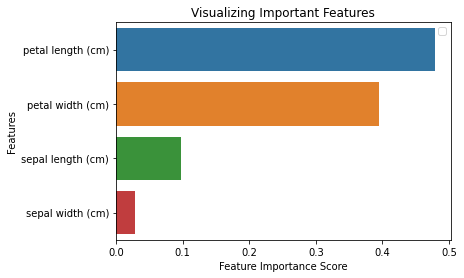

In [9]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()